# Методы оптимизации
## Лабораторная работа № 1
### Методы минимизации функции одной переменной

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['figure.figsize'] = (20, 12) #это математический пакет?

In [3]:
funcs = [(lambda x: x**3 - 3*np.sin(x),[0,1]),
            (lambda x: x**4 + x**2 + x + 1,[-1,0]),
            (lambda x: np.exp(x) + 1/x,[-1,-10**-8]),
            (lambda x: x**2 - 2*x + np.exp(-x),[-1,1.5]),
            (lambda x: x*np.sin(x) + 2*np.cos(x),[-6,-4]),
            (lambda x: x + 1/(x**2),[1,2]),
            (lambda x: 10*x*np.log(x) - (x**2)/2,[0.1,1]),
            (lambda x: np.exp(x) - (x**3)/3 + 2*x,[-2.5,-1]),
            (lambda x: x**2 - 2*x - 2*np.cos(x),[-0.5,1]),]

def select_function(n): #Ты описал все функции
    return funcs[n-1]   #Что конкретно возвращается?

In [14]:
# для тестирования методов
def test_func(func,args=None,n=1,eps=10**-5,title=None,f=None):
    plt.figure()
    if title:
        plt.title(title)
    sns.set_context("poster")
    if f:
        f,bounds = f
    else:
        f,bounds = select_function(n)
    x = np.linspace(bounds[0],bounds[1],1000)
    
    plt.plot(x,f(x))
    plt.xlabel('x')
    plt.ylabel('y')
    
    if args:
        x,y,n = func(f,bounds,eps=eps,**args)
    else:
        x,y,n = func(f,bounds,eps=eps)
    plt.scatter(x,y,color='red')
    print(int(x/eps)*eps,int(y/eps)*eps,n)

    
    
    #Как происходит тестирование?
    #Это последняя запись, как я понял, была выбрана только одна функция, но какая?
    #И зачем были вообще записаны все функции?

#### Метод перебора

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


0.7000000000000001 -1.6 10


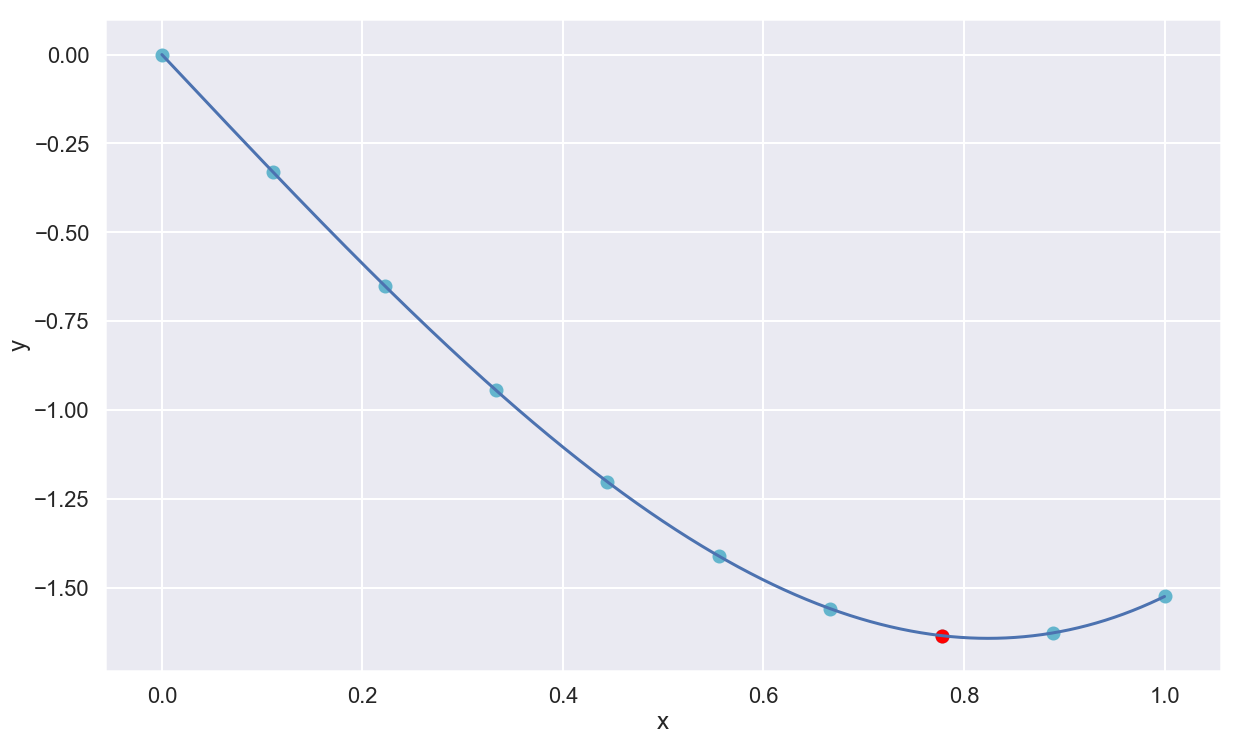

In [15]:
def bust(f,bounds,eps=0.0001,verbose=False):
    a,b = bounds
    n = np.ceil((b-a)/eps)
    x = np.linspace(a,b,n)
    y = f(x)
    m = np.argmin(y)
    if verbose:
        plot_bust(x,y)
    return x[m],y[m],len(x)

def plot_bust(x,y):
    plt.scatter(x,y,color='c')

test_func(bust,eps=0.1,args={'verbose':True})

#### Метод поразрядного поиска

0.82413 -1.64213 48


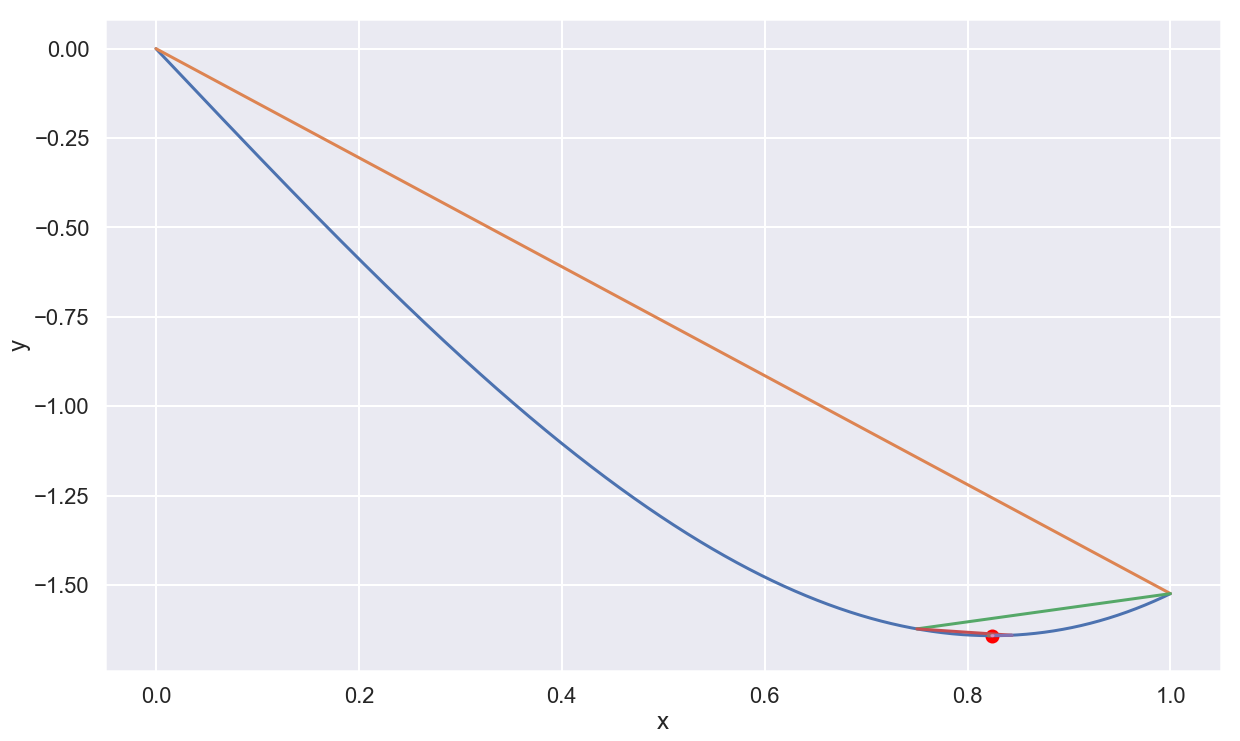

In [16]:
def iteration_striking_search(f,x,delta,f1,n=1):
    x += delta
    f2 = f(x)
    n += 1
    
    while f2 < f1:
        f1 = f2
        x += delta
        f2 = f(x)
        n += 1
        
    return x,f2,n
    

def striking_search(f,bounds,delta=0.25,eps=0.00001,eta=-4,verbose=False):
    a,b=bounds
    
    x = a
    f2 = f(x)
    n = 1
    old_x = x
    old_f = f2
    
    while not np.abs(delta*eta) < eps:    
        x,f2,n = iteration_striking_search(f,x,delta,f2,n)
        
        if verbose:
            plt.plot([old_x,x],[old_f,f2])
            old_x = x
            old_f = f2
        
        delta /= eta
    
    return x-delta*eta,f2,n

test_func(striking_search,args={'verbose':True})

#### Метод дихотомии

0.82413 -1.64213 34


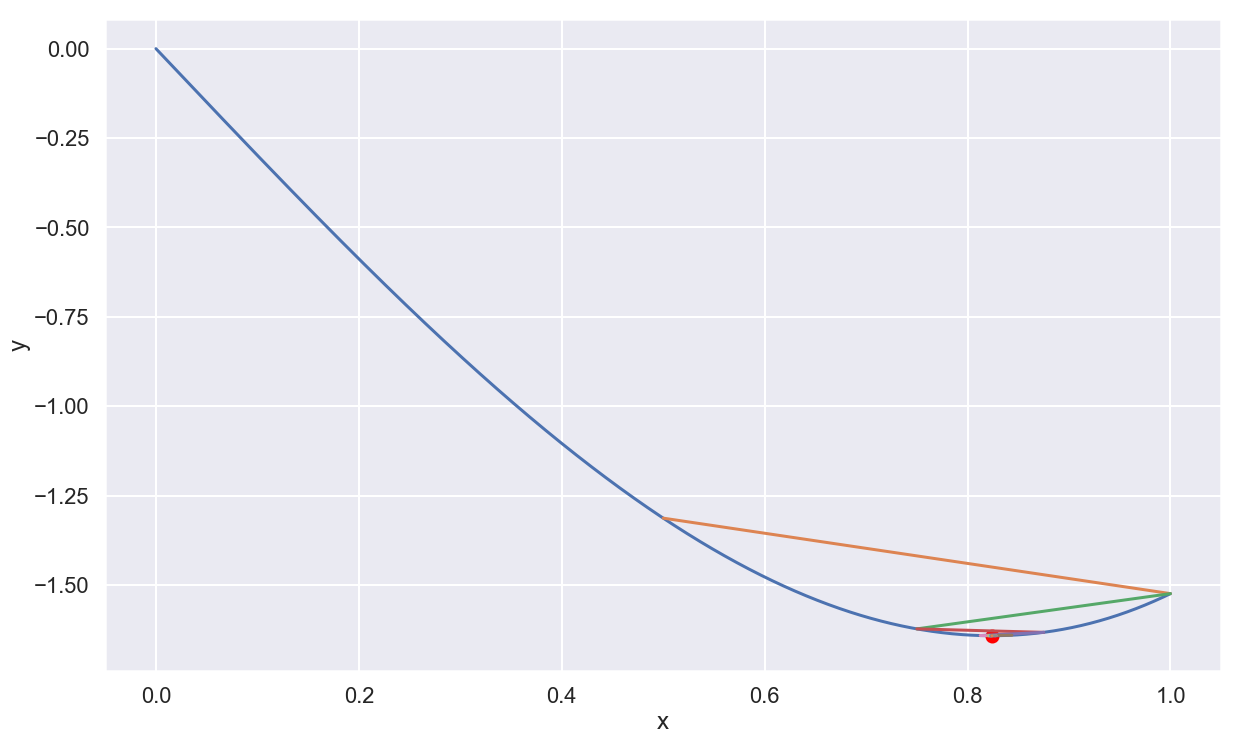

In [17]:
def iteration_dichotomy(f,a,b,delta,n=0):
    x1,x2 = (a + b - delta)/2,(a + b + delta)/2
    f1,f2 = f(x1),f(x2)
    
    if f1 <= f2:
        b = x2
    else:
        a = x1
    return a,b,n+2,(b-a)/2

def dichotomy(f,bounds,eps=0.00001,delta=0,verbose=False):
    if not (delta > 0 and delta < 2*eps):
        delta = eps
        
    a,b = bounds
    
    a,b,n,en = iteration_dichotomy(f,a,b,delta)
    
    while not en < eps:
        if verbose :
            plt.plot([a,b],[f(a),f(b)])
            
        a,b,n,en = iteration_dichotomy(f,a,b,delta,n)
        
    
    x = (a+b)/2
    return x,f(x),n
        
    
test_func(dichotomy,args={'verbose':True})

#### Метод золотого сечения

0.82413 -1.64213 25


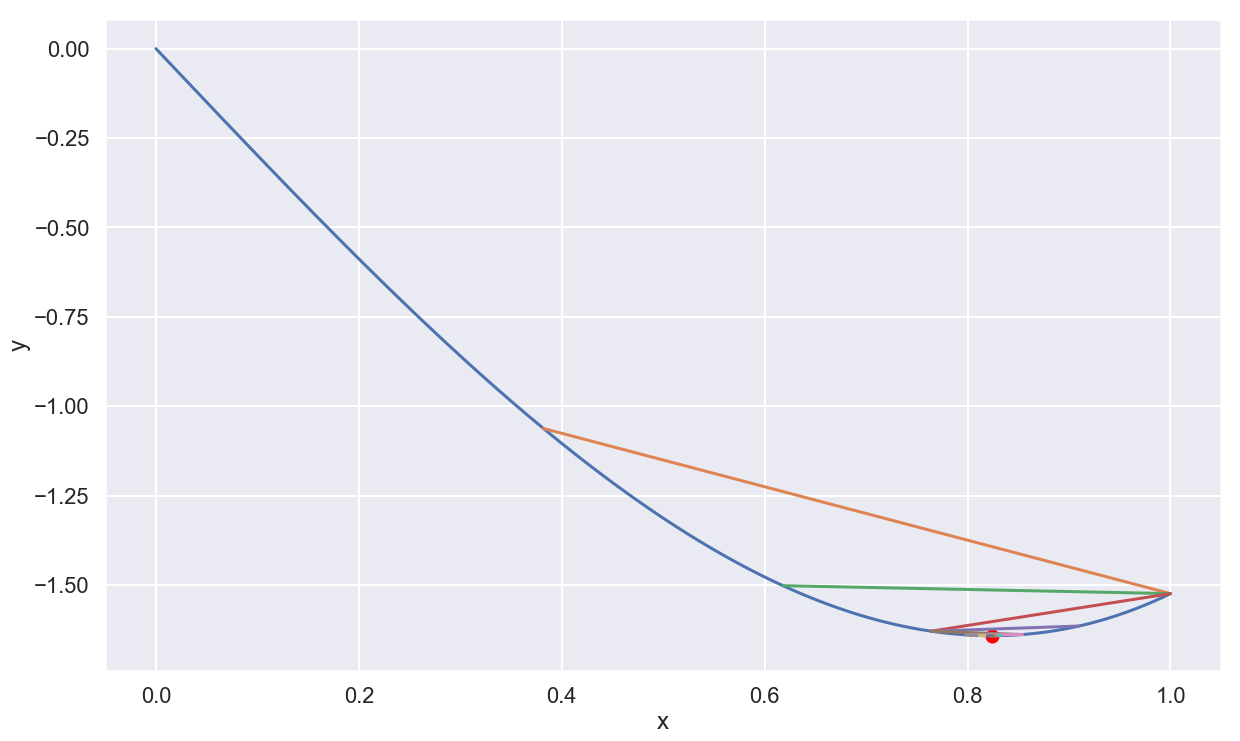

In [18]:
def iteration_golden_section(f,a,b,x1,x2,f1,f2,t,n=0):
   
    if f1 <= f2:
        #b,x2,f2,x1 = x2,x1,f1,(b - (1 - t)*(b-a))
        b,x2,f2 = x2,x1,f1
        x1 = b - t*(b-a)
        f1 = f(x1)
    else:
        #a,x1,f1,x2 = x1,x2,f2,(b - t*(b-a))
        a,x1,f1 = x1,x2,f2
        x2 = b - (1 - t)*(b-a)
        f2 = f(x2)
    
    n += 1
    
    return a,b,x1,x2,f1,f2,n
   
    
def golden_section(f,bounds,eps=0.001,verbose=False):
    a,b = bounds
    
    t = (np.sqrt(5) - 1)/2
    
    x1 = a + (1 - t)*(b - a)
    x2 = a + (t)*(b - a)
    
    f1 = f(x1)
    f2 = f(x2)
    n = 2
    
    #a,b,x1,x2,f1,f2,n = iteration_golden_section(f,a,b,x1,x2,f1,f2,t,n)
    
    en = (b-a)/2
    
    while not en < eps:
            
        a,b,x1,x2,f1,f2,n = iteration_golden_section(f,a,b,x1,x2,f1,f2,t,n)
        en *= t
        
        if verbose :
            plt.plot([a,b],[f(a),f(b)])
    
    x = (a + b)/2
    
    return x,f(x),n
    

test_func(golden_section,args={'verbose':True})

#### Метод парабол

0.8240000000000001 -1.6420000000000001 7


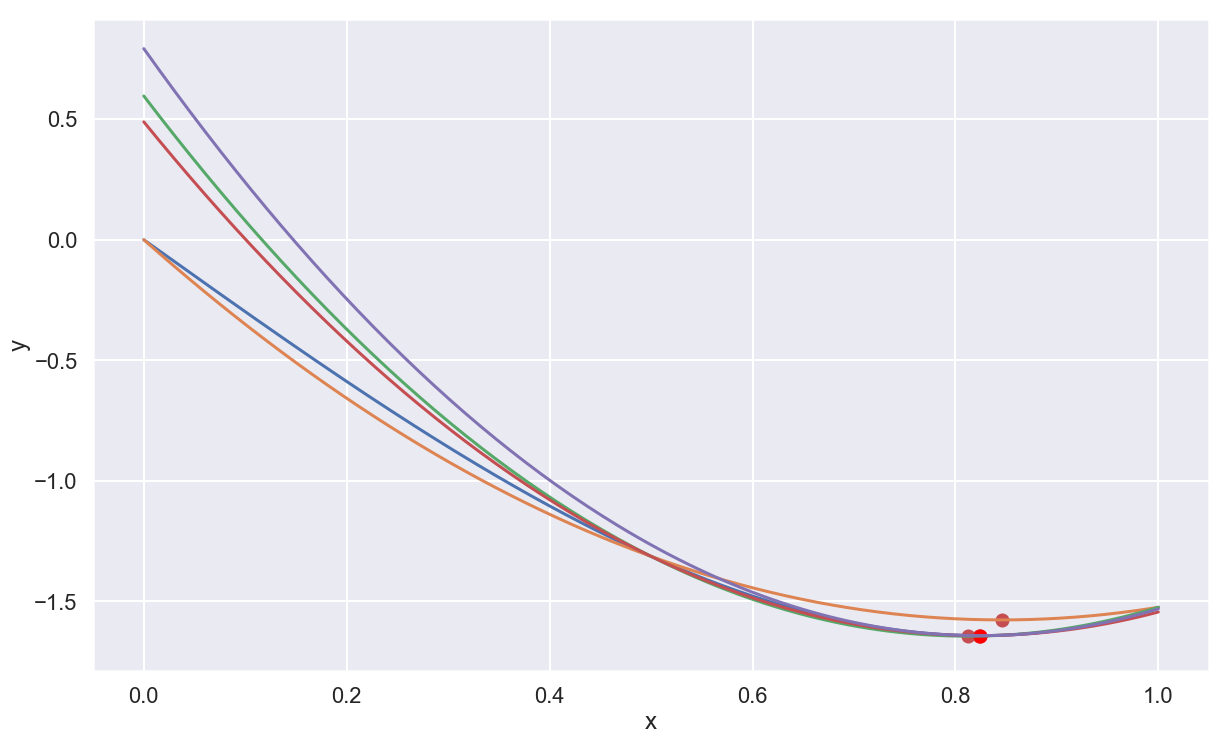

In [19]:
def iteration_parabola(f,x1,x2,x3,f1,f2,f3,a,b,n=0,verbose=False):
    
    a0 = f1
    a1 = (f2-f1)/(x2-x1)
    a2 = ((f3-f1)/(x3-x1)-(f2-f1)/(x2-x1))/(x3-x2)
    
    x = (x1 + x2 - a1/a2)/2
    fx = f(x)
    n += 1
    
    
    
    if verbose:
        x_p = linspace(a,b,200)
        y_p = lambda x:a0 + a1*(x-x1) + a2*(x-x1)*(x-x2)
        plt.plot(x_p,y_p(x_p))
        plt.scatter(x,y_p(x),color='r')
    
    
    if x > x2 and fx > f2:
        x3,f3 = x,fx
    elif x > x2 and fx < f2:
        x1,f1 = x2,f2
        x2,f2 = x,fx
    elif x < x2 and fx > f2:
        x1,f1 = x,fx
    elif x < x2 and fx < f2:
        x3,f3 = x2,f2
        x2,f2 = x,fx
        
        
    return x,x1,x2,x3,f1,f2,f3,n
    
def parabola(f,bounds,eps=0.001,n=0,verbose=False):
    a,b = bounds
    
    x1,x2,x3 = a,(a+b)/2,b
    f1,f2,f3 = f(x1),f(x2),f(x3)
    n += 3
    
    x0,x1,x2,x3,f1,f2,f3,n = iteration_parabola(f,x1,x2,x3,f1,f2,f3,a,b,n,verbose=verbose)
    
    delta = 1
    
    while not delta < eps:
        
        x,x1,x2,x3,f1,f2,f3,n = iteration_parabola(f,x1,x2,x3,f1,f2,f3,a,b,n,verbose=verbose)
        
        delta = np.abs(x0 - x)
        
        x0 = x
        
    return x0,f(x0),n

test_func(parabola,eps=0.001,args={'verbose':True})
    

In [20]:
# центральная
def cf(f,x,h=0.001):
    return (f(x+h)-f(x-h))/(2*h)

# вторая
def cff(f,x,h=0.001):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

# левая
def lf(f,x,h=0.001):
    return (f(x)-f(x-h))/h

# правая
def rf(f,x,h=0.001):
    return (f(x+h)-f(x))/h

#### Метод средней точки

0.82413 -1.64213 18


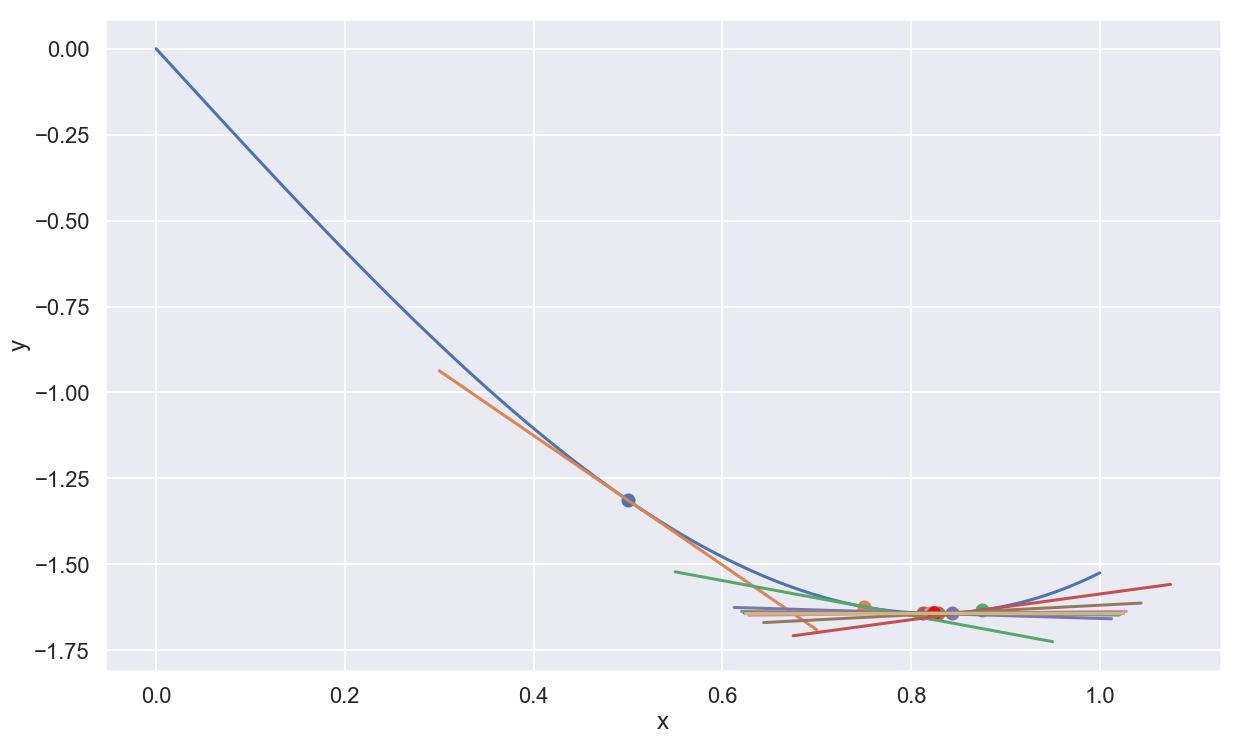

In [21]:
def iteration_midpoint(f,a,b,der=cf,n=0):
    x = (a + b)/2
    df = der(f,x)
    
    if df > 0:
        b = x
    else:
        a = x
        
    return x,df,a,b,n+1
    

def midpoint(f,bounds,eps=0.001,n=0,der=cf,verbose=False):
    a,b = bounds
    
    df = 1
    x = (a+b)/2
    
    dp = (b-a)/5
    
    while not np.abs(df) < eps:
        x,df,a,b,n = iteration_midpoint(f,a,b,der=der,n=n)
        
        if verbose:
            x_p = linspace(x-dp,x+dp,200)
            plt.plot(x_p,df*(x_p-x)+f(x))
            plt.scatter(x,f(x))
        
    return x,f(x),n

test_func(midpoint,args={'verbose':True})
    

#### Метод хорд

0.82413 -1.64213 8


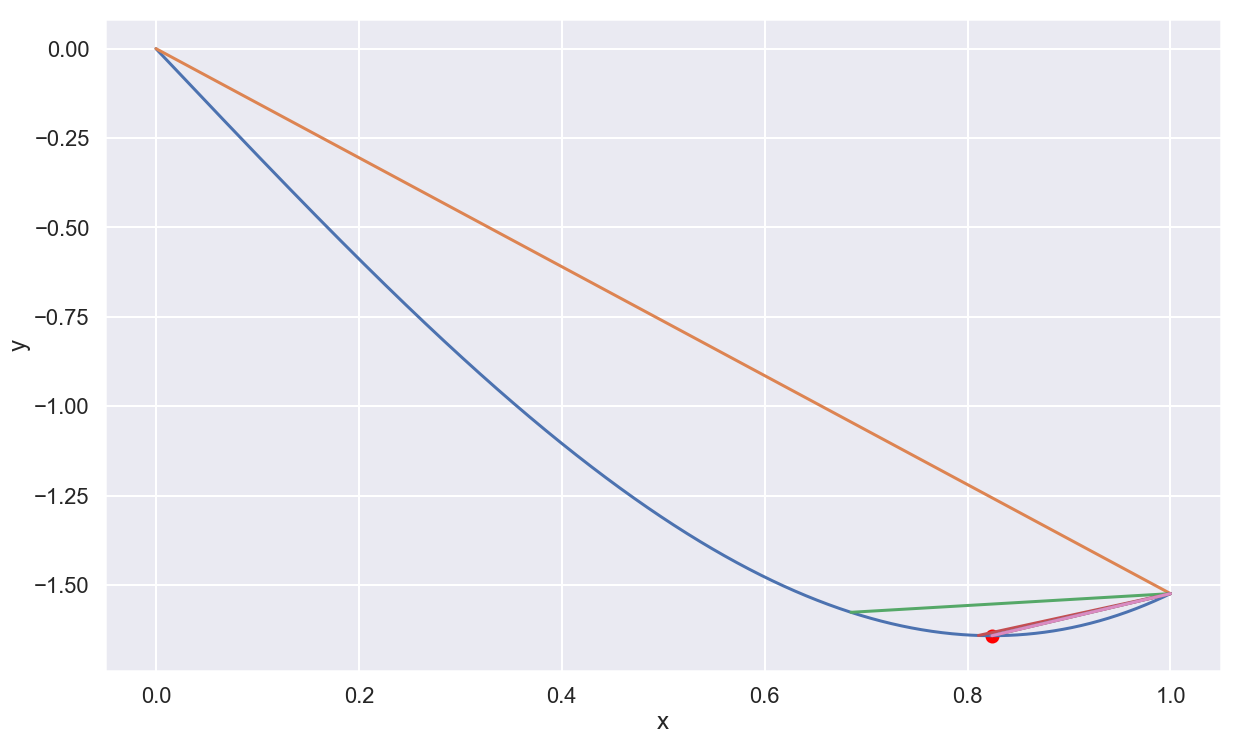

In [22]:
def iteration_chord(f,a,b,da,db,der=cf,n=0):
    x = a - da/(da - db)*(a-b)
    
    df = der(f,x)
    
    if df > 0:
        b = x
        db = df
    else:
        a = x
        da = df
        
    return x,df,a,b,da,db,n+1
    
def chord(f,bounds,eps=0.001,der=cf,n=0,verbose=False):
    a,b = bounds
    
    da = der(f,a)
    db = der(f,b)
    
    n = 2
    
    df = 1
    x = 0
    
    while not np.abs(df) < eps:
        if verbose:
            plt.plot([a,b],[f(a),f(b)])
            
        x,df,a,b,da,db,n = iteration_chord(f,a,b,da,db,der=der,n=n)
        
    
    return x,f(x),n

test_func(chord,args={'verbose':True})

#### Метод Ньютона


In [ ]:
def newton(f,bounds,x0=0,eps=0.001,der=cf,der2=cff,n=0,verbose=False):
 
    df = 1
    
    while not np.abs(df) < eps:
        
        if verbose:
            plt.scatter(x0,f(x0),color='r')
        
        df = der(f,x0)
        dff = der2(f,x0)
        x0 -=df/dff
        n += 2
        
    return x0,f(x0),n

test_func(newton,args={'x0':0,'verbose':True})

##### Задание №3 №4

Метод поразрядного поиска 0.01
Метод поразрядного поиска 0.001
Метод поразрядного поиска 0.0001
Метод поразрядного поиска 1e-05
Метод поразрядного поиска 1e-06
Метод поразрядного поиска 1e-07
Метод поразрядного поиска 1e-08
Метод дихотомии 0.01
Метод дихотомии 0.001
Метод дихотомии 0.0001
Метод дихотомии 1e-05
Метод дихотомии 1e-06
Метод дихотомии 1e-07
Метод дихотомии 1e-08
Метод золотого сечения 0.01
Метод золотого сечения 0.001
Метод золотого сечения 0.0001
Метод золотого сечения 1e-05
Метод золотого сечения 1e-06
Метод золотого сечения 1e-07
Метод золотого сечения 1e-08
Метод параболы 0.01
Метод параболы 0.001
Метод параболы 0.0001
Метод параболы 1e-05
Метод параболы 1e-06
Метод параболы 1e-07
Метод параболы 1e-08
Метод средней точки center 0.01
Метод средней точки center 0.001
Метод средней точки center 0.0001
Метод средней точки center 1e-05
Метод средней точки center 1e-06
Метод средней точки center 1e-07
Метод средней точки center 1e-08
Метод хорд center 0.01
Метод хорд center 

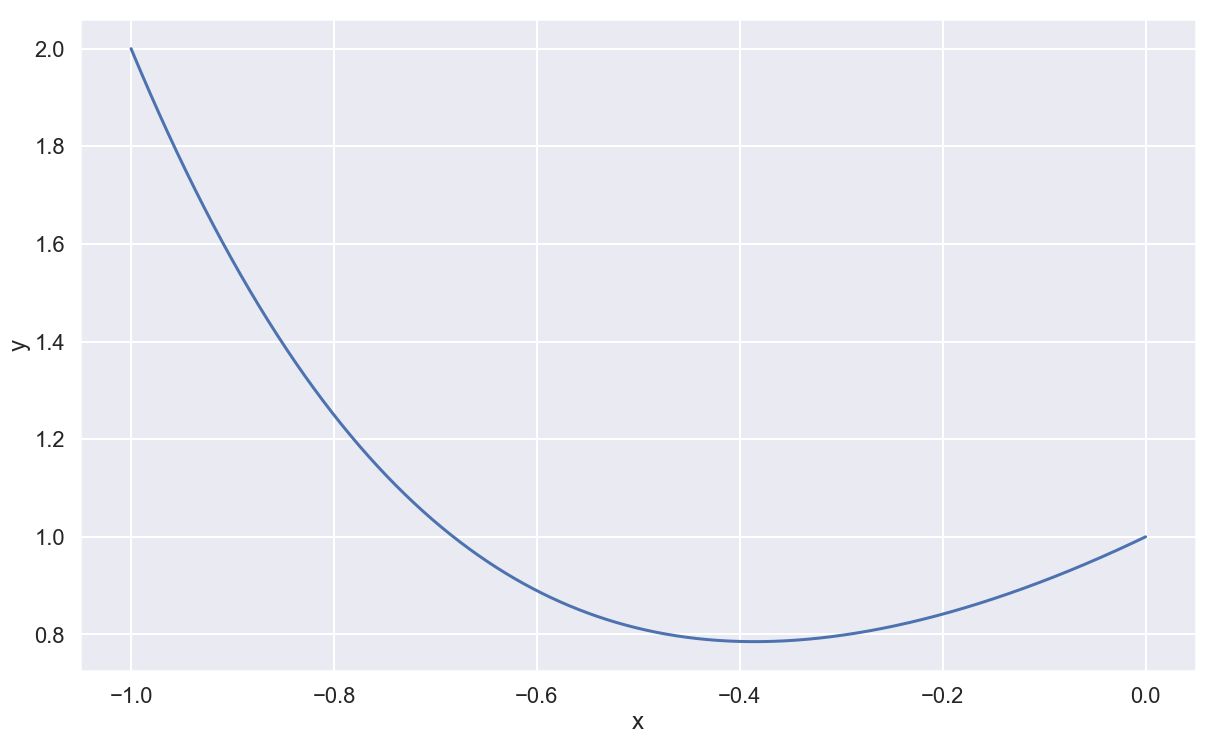

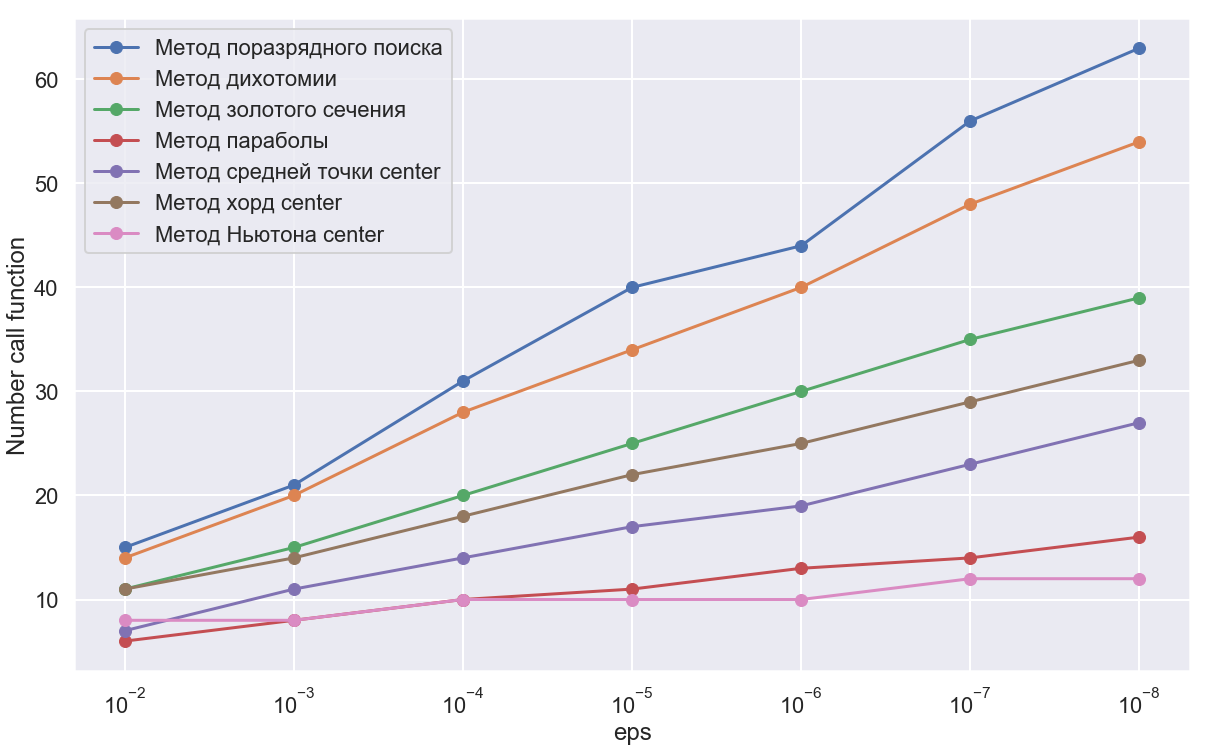

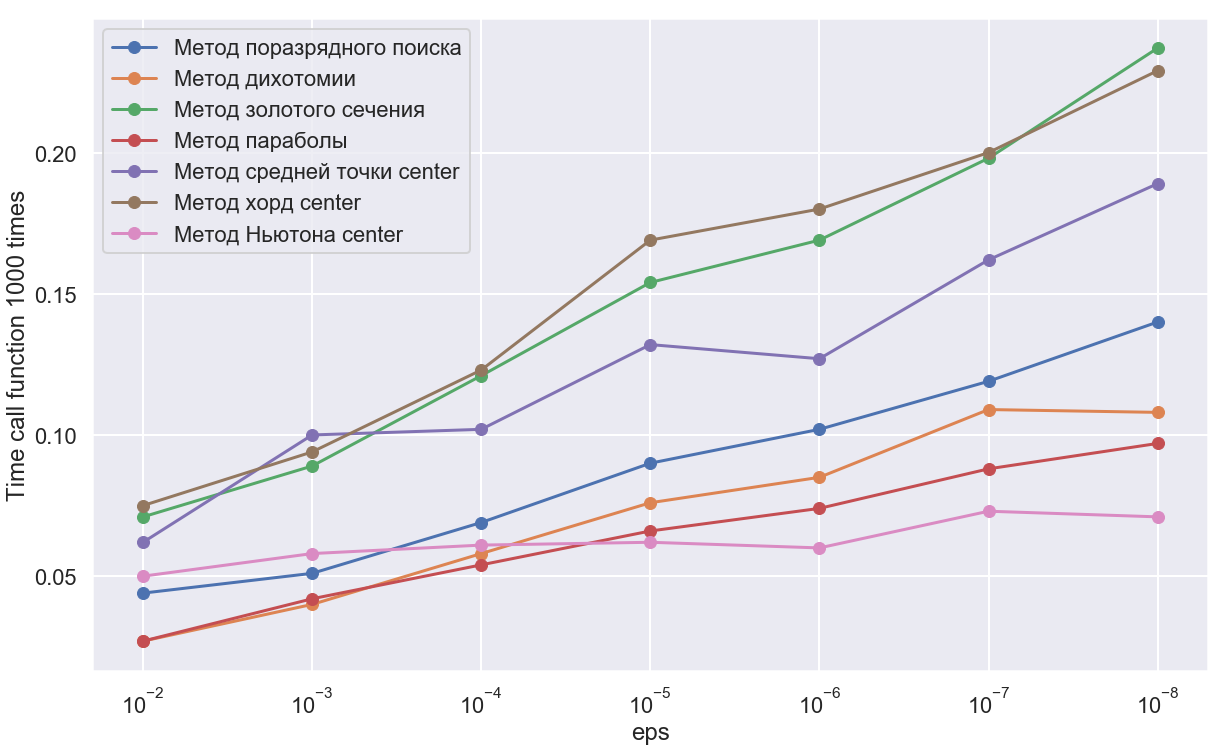

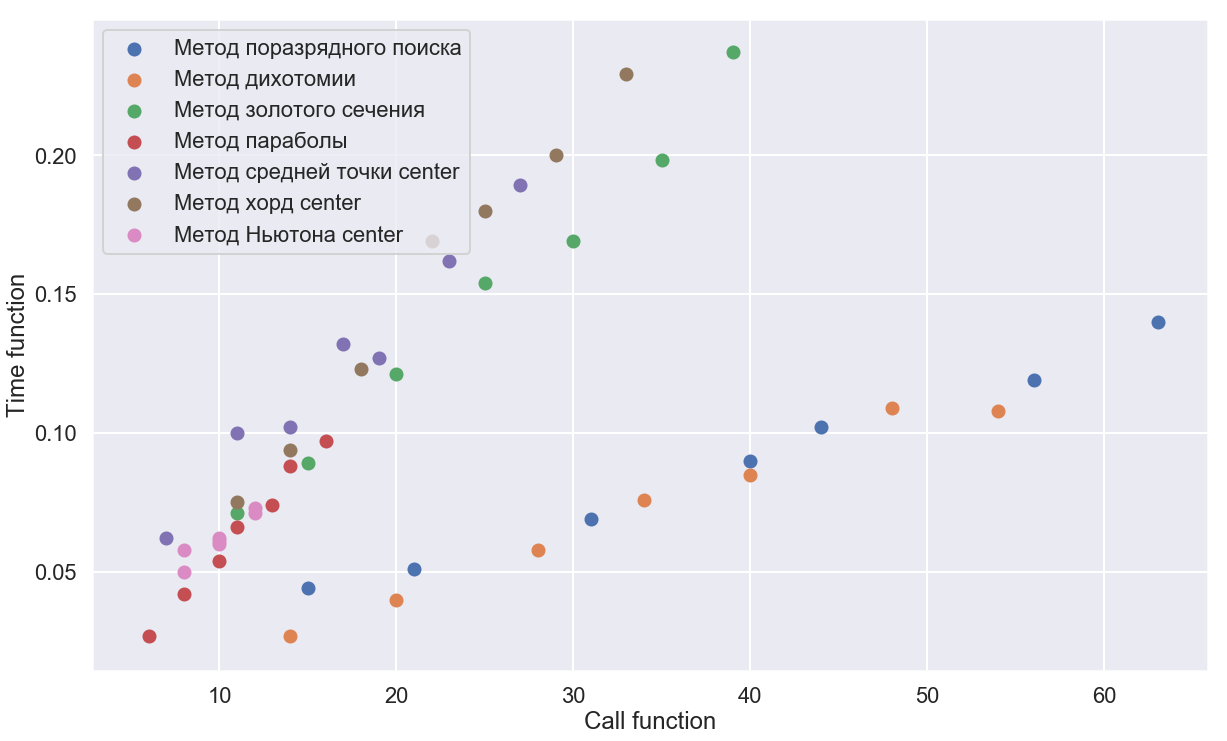

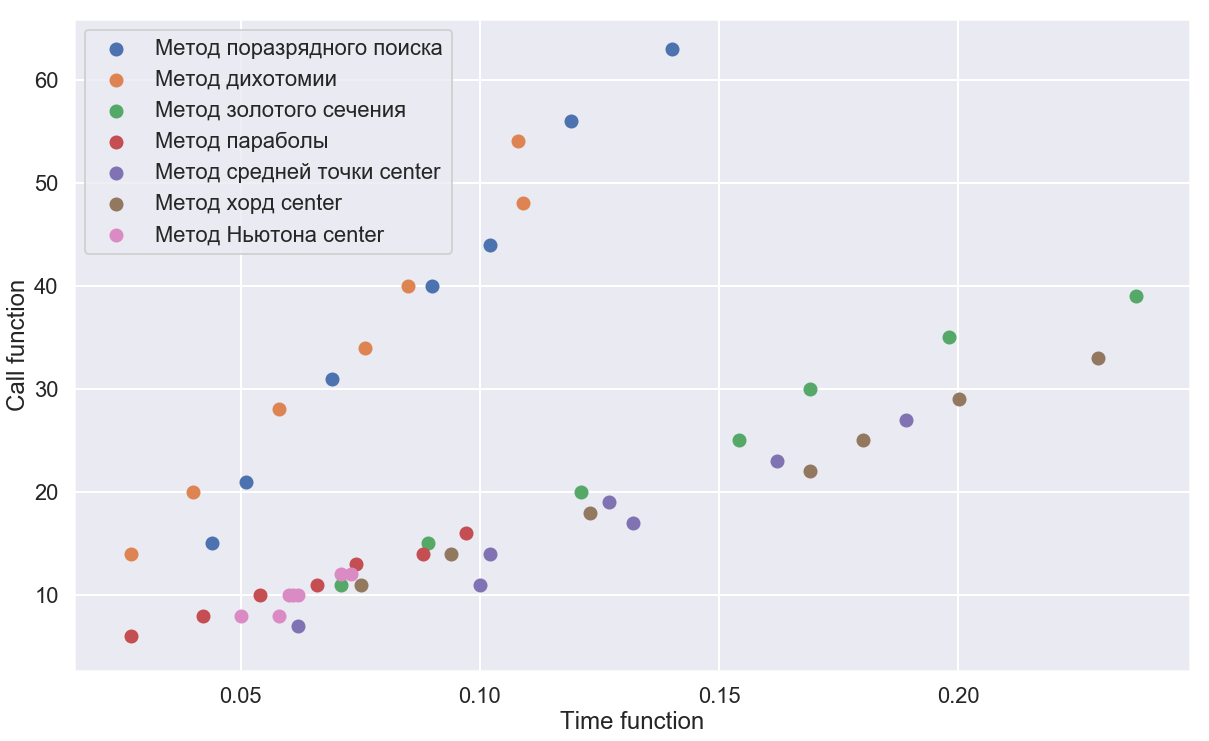

In [14]:

def test_func_for_all(number_function=2,eps=None):
    import time
    if eps == None:
        eps = [10**(-i) for i in range(2,9)]
    if type(eps) != list:
        eps = [eps]
    f,bounds = select_function(number_function)
    a,b = bounds
    
    # график функции
    
    x = np.linspace(a,b,1000)
    y = f(x)
    
    plt.figure()
    plt.plot(x,y)
    plt.xlabel('x')
    plt.ylabel('y')
    
    
    # cравнение методов
    
    methods = [(bust,{},'Метод перебора'),
               (striking_search,{},'Метод поразрядного поиска'),
               (dichotomy,{},'Метод дихотомии'),
               (golden_section,{},'Метод золотого сечения'),
               (parabola,{},'Метод параболы'),
               (midpoint,{'der':cf},'Метод средней точки center'),
               #(midpoint,{'der':rf},'Метод средней точки right'),
               #(midpoint,{'der':lf},'Метод средней точки left'),
               (chord,{'der':cf},'Метод хорд center'),
               #(chord,{'der':rf},'Метод хорд right'),
               #(chord,{'der':lf},'Метод хорд left'),
               (newton,{'x0':0,'der':cf},'Метод Ньютона center'),
               #(newton,{'x0':0,'der':rf},'Метод Ньютона right'),
               #(newton,{'x0':0,'der':lf},'Метод Ньютона left'),
              ]
    
    plt.figure()
    
    k = 1000
    methods_time = {}
    methods_call = {}
    
    for i,(method,params,method_name) in enumerate(methods[1:]):
        test_method = []
        methods_time[method_name] = []
        for e in eps:
            params['eps'] = e
            
            s = 0
            a = time.time()
            for i in range(k):
                _,_,n = method(f,bounds,**params)
                s += n
            b = time.time()
            print(method_name,e)
            methods_time[method_name].append(b-a)
            test_method.append(s/k)
            
        plt.plot(eps,test_method,'-o',label=method_name)
        methods_call[method_name] = test_method
        #plt.scatter(eps,test_method)
        
    plt.gca().invert_xaxis()
    plt.xlabel('eps')
    plt.ylabel('Number call function')
    plt.legend(loc='upper left')
    plt.xscale('log')
    
    plt.figure()
    for key in methods_time.keys():
        time = methods_time[key]
        plt.plot(eps,time,'-o',label=key)
    plt.gca().invert_xaxis()
    plt.xlabel('eps')
    plt.ylabel('Time call function '+str(k)+' times')
    plt.legend(loc='upper left')
    plt.xscale('log')
    
    
    plt.figure()
    for key in methods_time.keys():
        time = methods_time[key]
        call = methods_call[key]
        plt.scatter(call,time,label=key)
    
    plt.xlabel('Call function')
    plt.ylabel('Time function')
    plt.legend(loc='upper left')
    
    plt.figure()
    for key in methods_time.keys():
        time = methods_time[key]
        call = methods_call[key]
        plt.scatter(time,call,label=key)
    
    plt.ylabel('Call function')
    plt.xlabel('Time function')
    plt.legend(loc='upper left')
    
test_func_for_all(number_function=2)
    

##### Задание №5

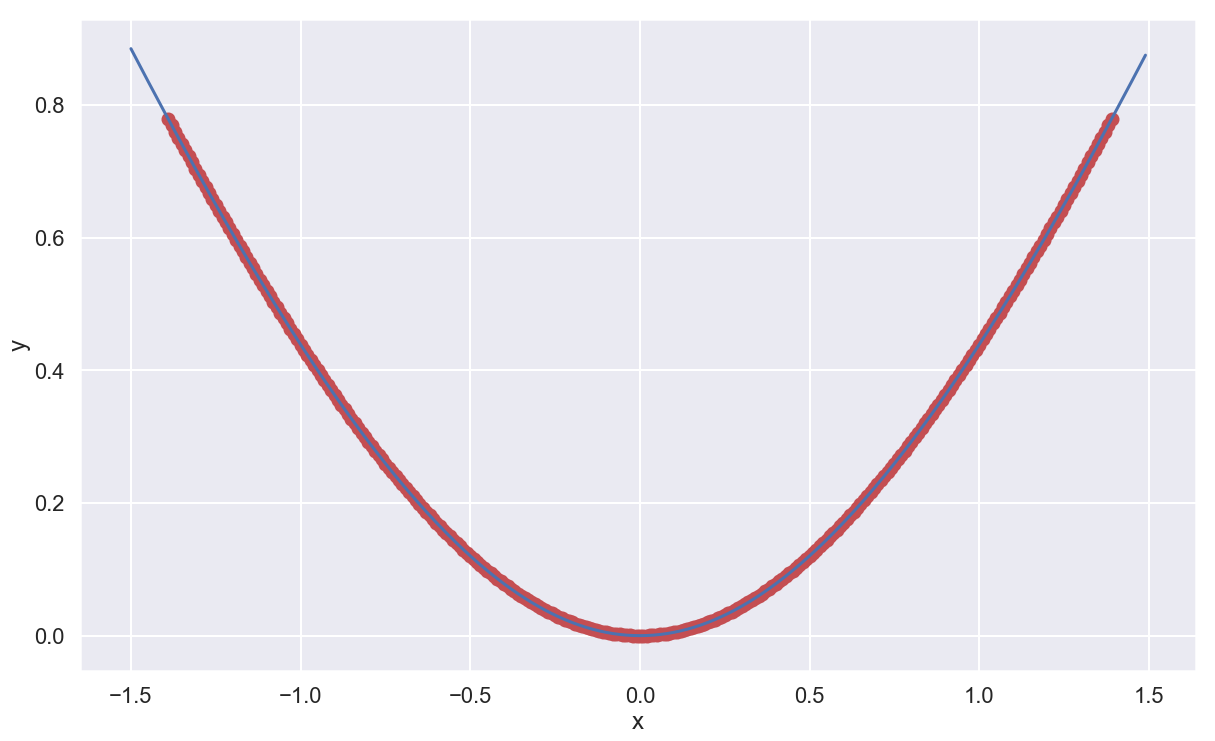

In [15]:
def newton2(f,x0=0,eps=0.001,der=cf,der2=cff,n=0):
 
    df = 1
    old = df
    
    while not np.abs(df) < eps:
        
        df = der(f,x0)
        dff = der2(f,x0)
        x0 -=df/dff
        if n > 0 and np.abs(df) >= old:
            return 0,0,0
        n += 2
        old = np.abs(df)
        
    return x0,f(x0),n


f = lambda x: x*np.arctan(x) - np.log(1+x**2)/2

a = -1.5
b = 1.5
x = np.arange(a,b,0.01)
y = f(x)
plt.plot(x,y)

ma = b
mb = a
# определение диапазона нач. значений (численно)
for i in x:
    x,y,n = newton2(f,eps=10**-4,x0=i)
    if n > 0:
        if i < ma:
            ma = i
        if i > mb:
            mb = i
            
            
def test_newton2(method,f,x0=0,eps=10**-4):
    x,y,n = method(f,eps=eps,x0=x0)
    if n > 0:
        plt.scatter(x0,f(x0),color='r')
    plt.xlabel('x')
    plt.ylabel('y')
    
x = np.arange(a,b,0.01)
for i in x:
    test_newton2(newton2,f,x0=i)
    

In [18]:
# тест
# диапазон начальных значений для которых метод ньютона сходится
print(ma,mb)
print(newton2(f,x0=ma+0.01))
print(newton2(f,x0=ma-0.01))
print(newton2(f,x0=mb+0.01))
print(newton2(f,x0=mb-0.01))

-1.39 1.3900000000000023
(2.0215382265289378e-11, 4.086616801317763e-22, 16)
(0, 0, 0)
(0, 0, 0)
(-2.0242289642440417e-11, 4.097502899684506e-22, 16)


(-0.615840287135601, (3.1486149830213605e-15, 9.913776311306602e-30, 8))

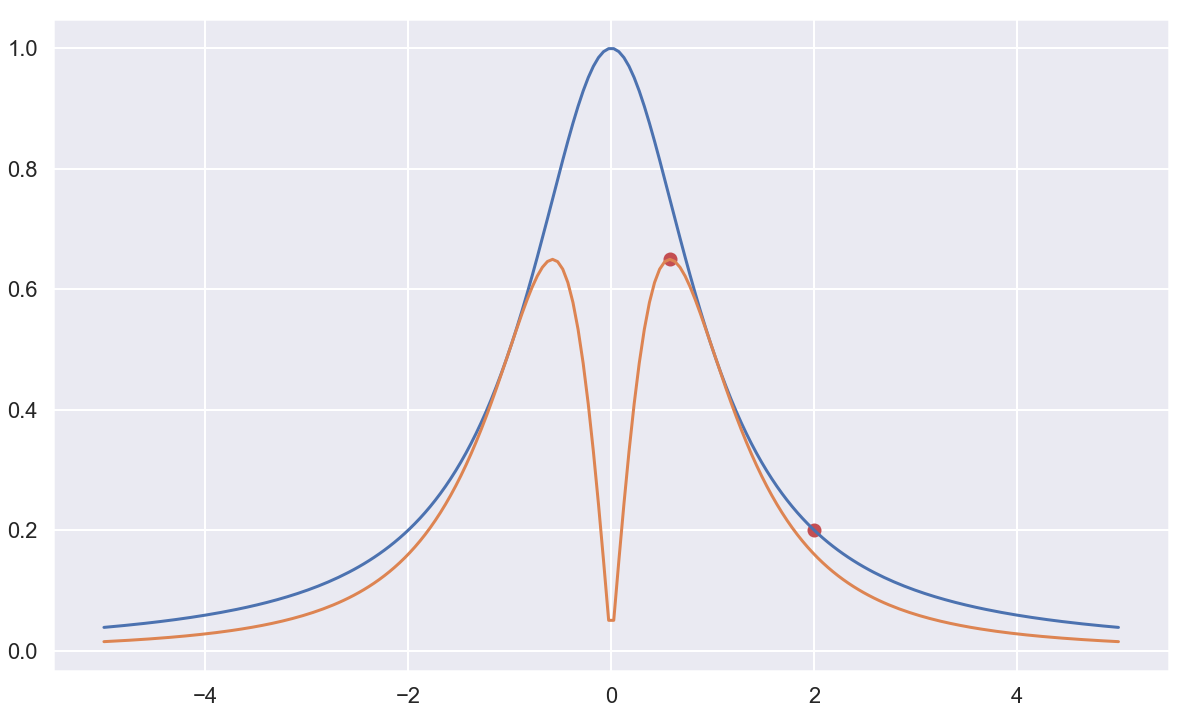

In [19]:
# вычисление диапазона нач. значений (по формуле)
from sympy import diff, symbols, atan, log
from scipy.optimize import minimize

f = lambda x: x*np.arctan(x) - np.log(1+x**2)/2

x = symbols('x')
fun = x*atan(x) - log(1+x**2)/2

f2 = diff(fun,x,2)
f3 = diff(fun,x,3)

g2 = lambda x : np.abs(f2.subs({'x':x}))
g3 = lambda x : -np.abs(f3.subs({'x':x}))


M3 = minimize(g3,0,bounds=[(-2,2)])
m2 = minimize(g2,1,bounds=[(-2,2)])

x_min = minimize(f,0)

x = np.linspace(-5,5,200)
y = []
for i in x:
    y.append(g2(i))
plt.plot(x,y)

y2 = []
for i in x:
    y2.append(-g3(i))
plt.plot(x,y2)

x0 = 2*m2.fun/M3.fun
plt.scatter([m2.x,M3.x],[m2.fun,-M3.fun],color='r')

2*m2.fun/M3.fun,newton2(f,x0=float(m2.fun/M3.fun*2))

-1.91 0.5400000000000023


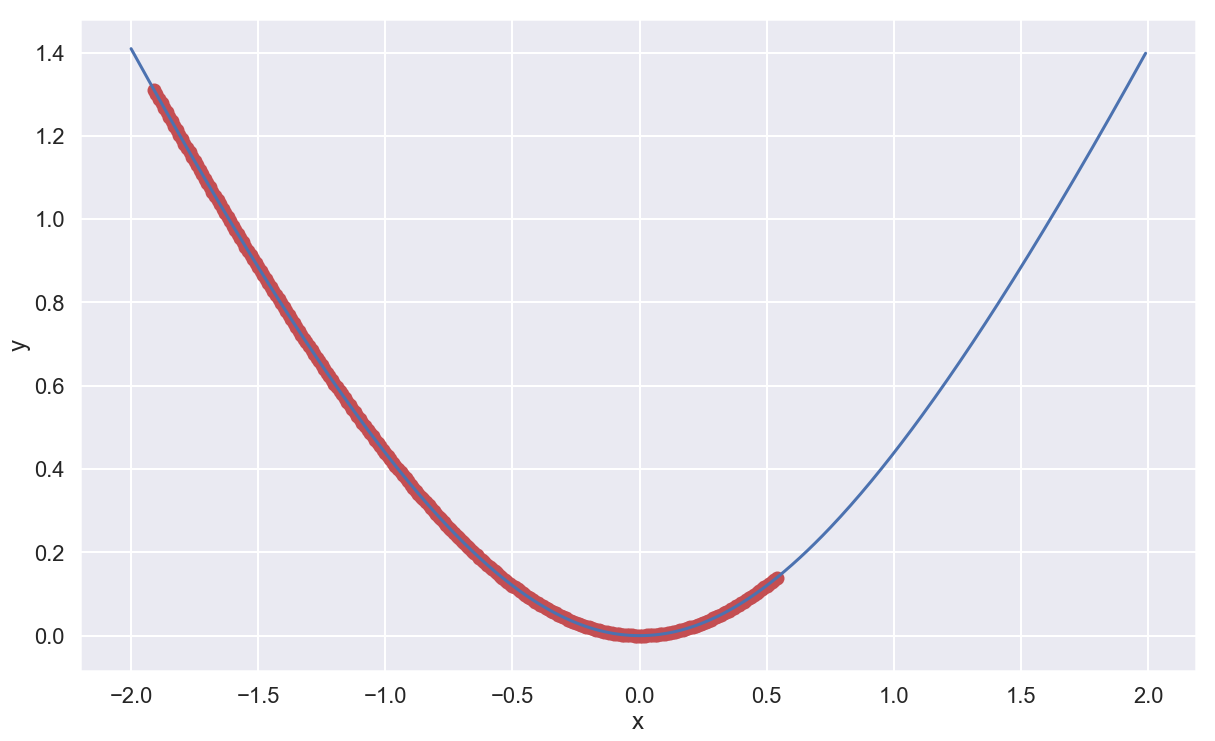

In [20]:
def rafson(f,x0=0,eps=0.001,der=cf,der2=cff,n=0):
 
    df = 1
    old = df
    
    while not np.abs(df) < eps:
        
        df = der(f,x0)
        dff = der2(f,x0)
        t = df**2/(df**2+der(f,x0-df/dff))
        x0 -= t*df/dff
        if n > 0 and np.abs(df) >= old:
            return 0,0,0
        n += 3
        old = np.abs(df)
        
    return x0,f(x0),n


f = lambda x: x*np.arctan(x) - np.log(1+x**2)/2

a = -2
b = 2
x = np.arange(a,b,0.01)
y = f(x)
plt.plot(x,y)

ma = b
mb = a
# определение диапазона нач. значений (численно)
for i in x:
    x,y,n = rafson(f,eps=10**-4,x0=i)
    if n > 0:
        if i < ma:
            ma = i
        if i > mb:
            mb = i
            

x = np.arange(a,b,0.01)
for i in x:
    test_newton2(rafson,f,x0=i)
    
    

# диапазон начальных значений для которых метод рафсона сходится
print(ma,mb)

1.7763568394002505e-15 1.5500000000000034


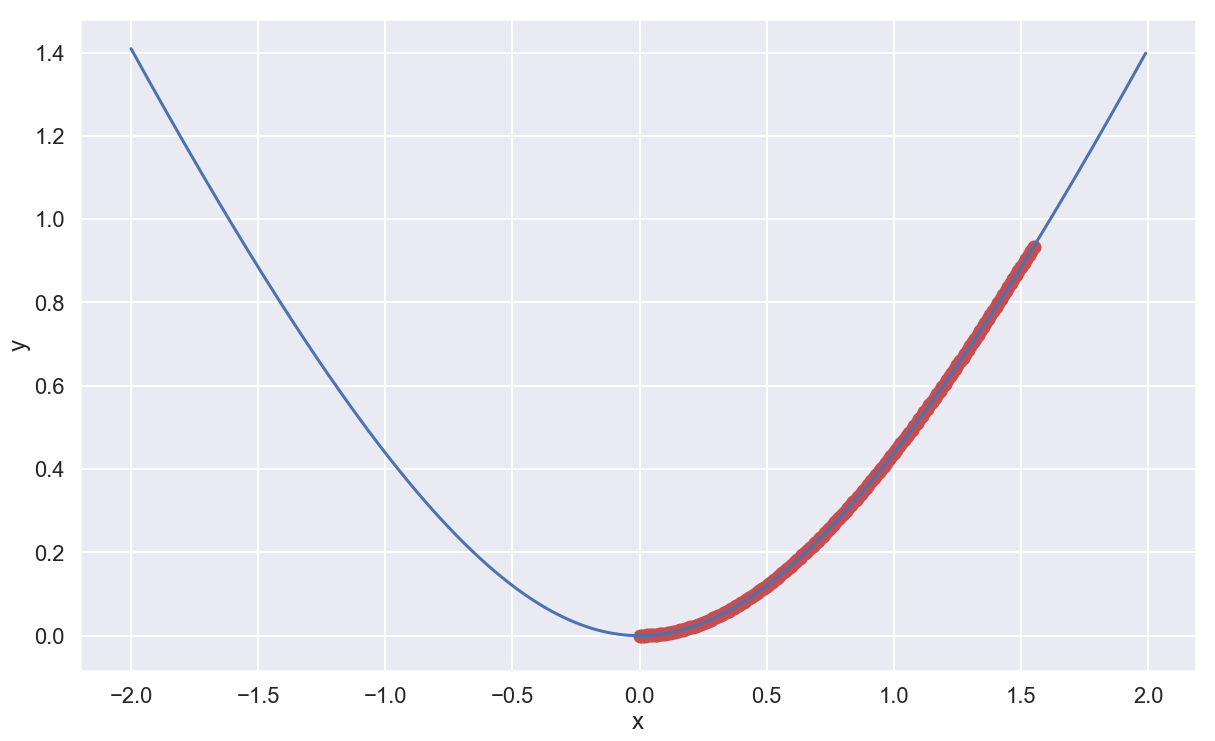

In [21]:
def makvard(f,x0=0,eps=0.001,der=cf,der2=cff,n=0):
 
    df = 1
    old = df
    mu = 10*der2(f,x0)
    n = 1
    
    while not np.abs(df) < eps:
        
        df = der(f,x0)
        dff = der2(f,x0)
        
        delta = df/(dff+mu)
        x0 -= delta
        if delta > 0:
            mu /=2
        else:
            mu *= 2
        if n > 0 and np.abs(df) >= old:
            return 0,0,0
        n += 3
        old = np.abs(df)
        
    return x0,f(x0),n


f = lambda x: x*np.arctan(x) - np.log(1+x**2)/2

a = -2
b = 2
x = np.arange(a,b,0.01)
y = f(x)
plt.plot(x,y)

ma = b
mb = a
# определение диапазона нач. значений (численно)
for i in x:
    x,y,n = makvard(f,eps=10**-4,x0=i)
    if n > 0:
        if i < ma:
            ma = i
        if i > mb:
            mb = i
            
    
x = np.arange(a,b,0.01)
for i in x:
    test_newton2(makvard,f,x0=i)
    

# диапазон начальных значений для которых метод рафсона сходится
print(ma,mb)

##### Задание № 6

In [22]:
from scipy.optimize import minimize
def iteration_broken(f,pair,L,n=0):
    x0,p0 = pair[0]
    
    for (x,p) in pair[1:]:
        if p < p0:
            x0,p0 = x,p
    
    fx0 = f(x0)
    delta = (fx0-p0)/L/2
    
    x1,x2,p = x0 - delta,x0 + delta, (fx0 + p0)/2
    
    pair.append((x1,p))
    pair.append((x2,p))
    pair.remove((x0,p0))
    
    return delta,pair,x0,p0,n+1
    
    
def broken(f,bounds,L=None,eps=10**-4,n=0):
    a,b = bounds
    if L == None:
        L = -minimize(lambda x: -np.abs(cf(f,x)),a,tol=10**-5).fun

    fa = f(a)
    fb = f(b)
    n = 2
    
    x0 = (fa-fb+L*(a+b))/2/L
    y0 = (fa+fb+L*(a-b))/2
      
    pair = []
    pair.append((x0,y0))
    
    delta = (f(x0)-y0)/L/2
    n += 1
    
    while not 2*L*delta < eps:
        delta,pair,x0,p0,n = iteration_broken(f,pair,L,n)
    
    return x0,f(x0),n

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


2.4587100000000004 -0.12832000000000002 1100000
2.4587000000000003 -0.12832000000000002 4663


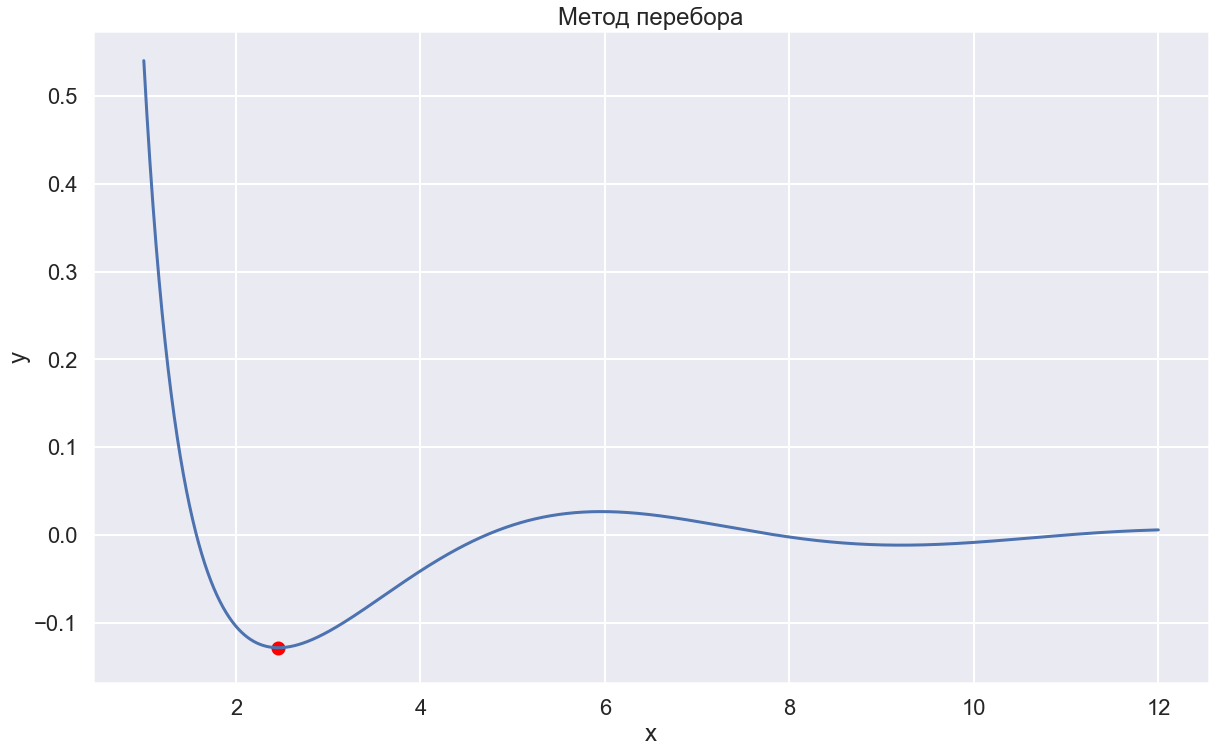

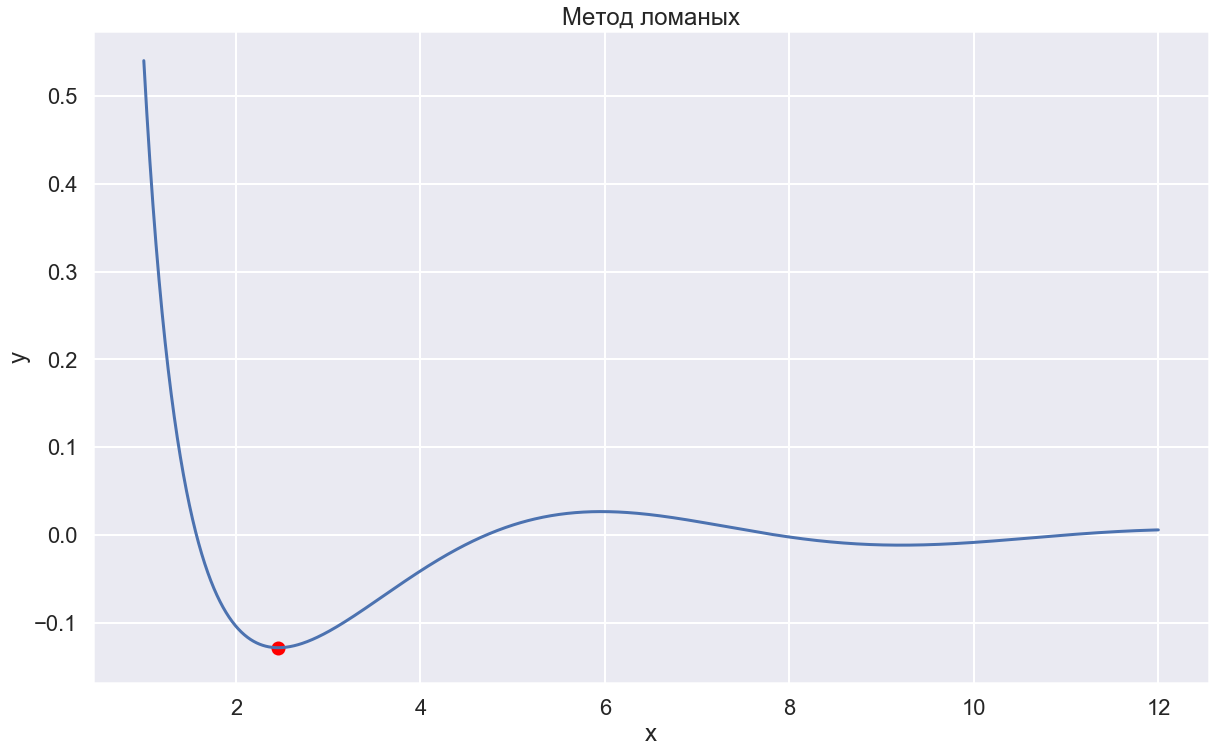

In [23]:
f1 = (lambda x: np.cos(x)/x/x,[1,12])
test_func(bust,f=f1,title="Метод перебора",args={'verbose':False})
test_func(broken,f=f1,title="Метод ломаных")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


1.17497 -1.8823400000000001 400000
1.17497 -1.8823400000000001 1693


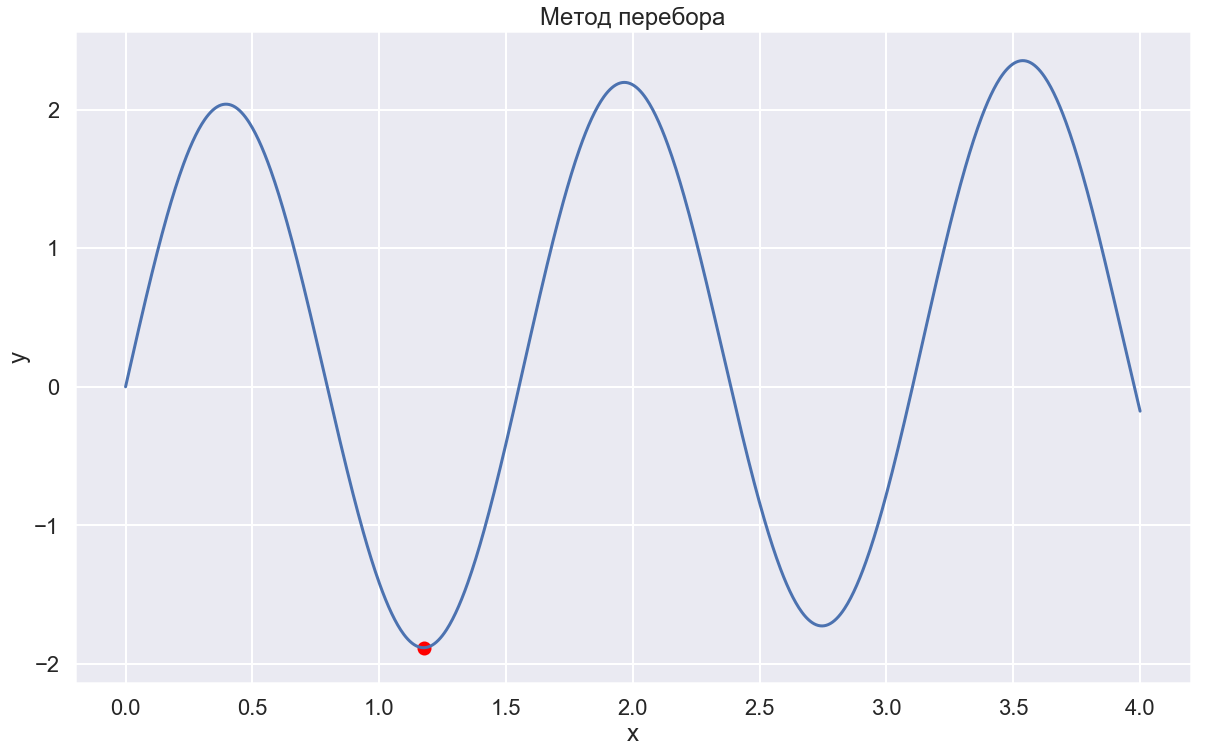

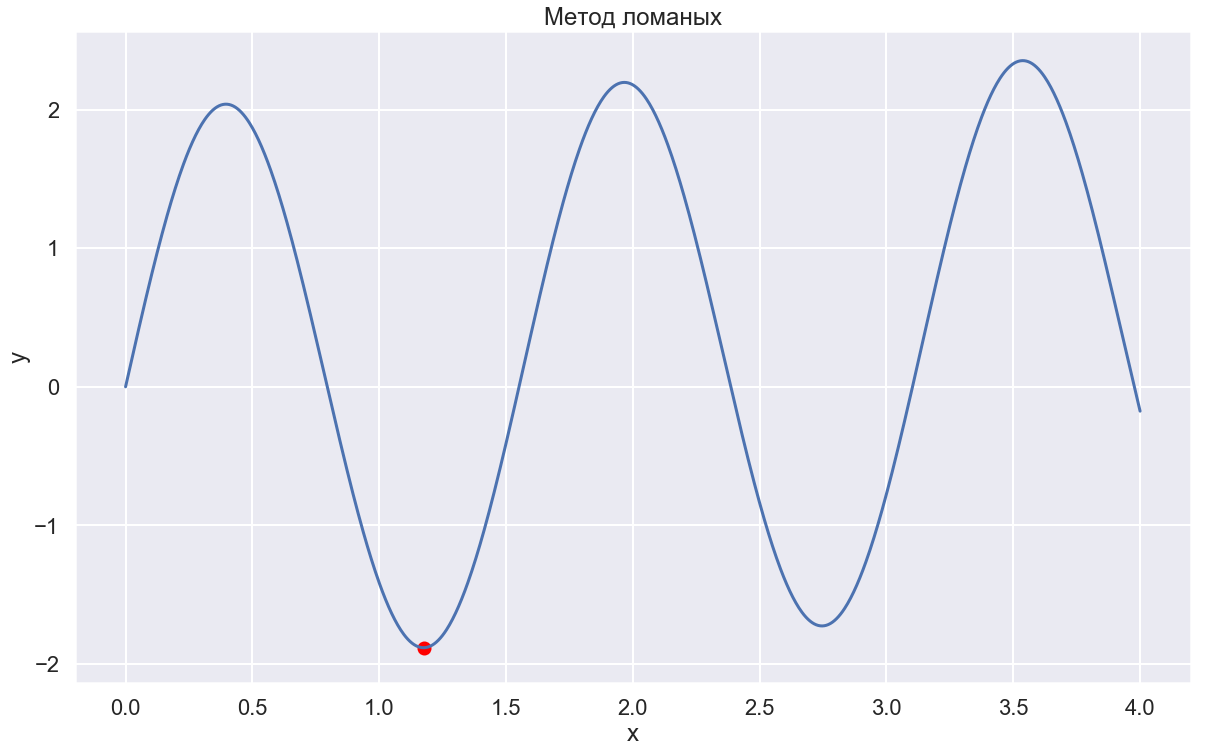

In [25]:
f2 = (lambda x: x/10 + 2*sin(4*x),[0,4])
test_func(bust,f=f2,title="Метод перебора",args={'verbose':False})
test_func(broken,f=f2,title="Метод ломаных")

L = [1.9220796]
- 0 20.40270747581702 4.238555968236315e-05 3
1 2.4586760889276476 -0.12832492836122256 1179
2 2.4583288697748222 -0.1283249158050739 2345
3 2.4582207465534704 -0.12832490768876645 4279
4 2.4582605767491974 -0.1283249109110936 4677
5 2.4585553141597125 -0.12832492632989634 5623
6 2.4585581415514834 -0.1283249264059328 8541
7 2.458764091031055 -0.12832492827235092 8951
8 2.4585840733500426 -0.1283249270396123 9345
9 2.4585930794132214 -0.12832492723281314 9737
10 2.4587344509041977 -0.12832492844999308 11229
11 2.4586369684990657 -0.1283249279760617 12321
12 2.458737327731745 -0.12832492843932547 17049
13 2.4585998964953353 -0.12832492736984247 17471
14 2.4586736810917156 -0.12832492834506515 17883
15 2.458614721173925 -0.1283249276404301 18281
16 2.458751754916288 -0.12832492836451143 18675
17 2.458744479779099 -0.12832492840668036 19069
18 2.4585889744142184 -0.12832492714646979 19459
19 2.458617518680397 -0.12832492768728126 21135


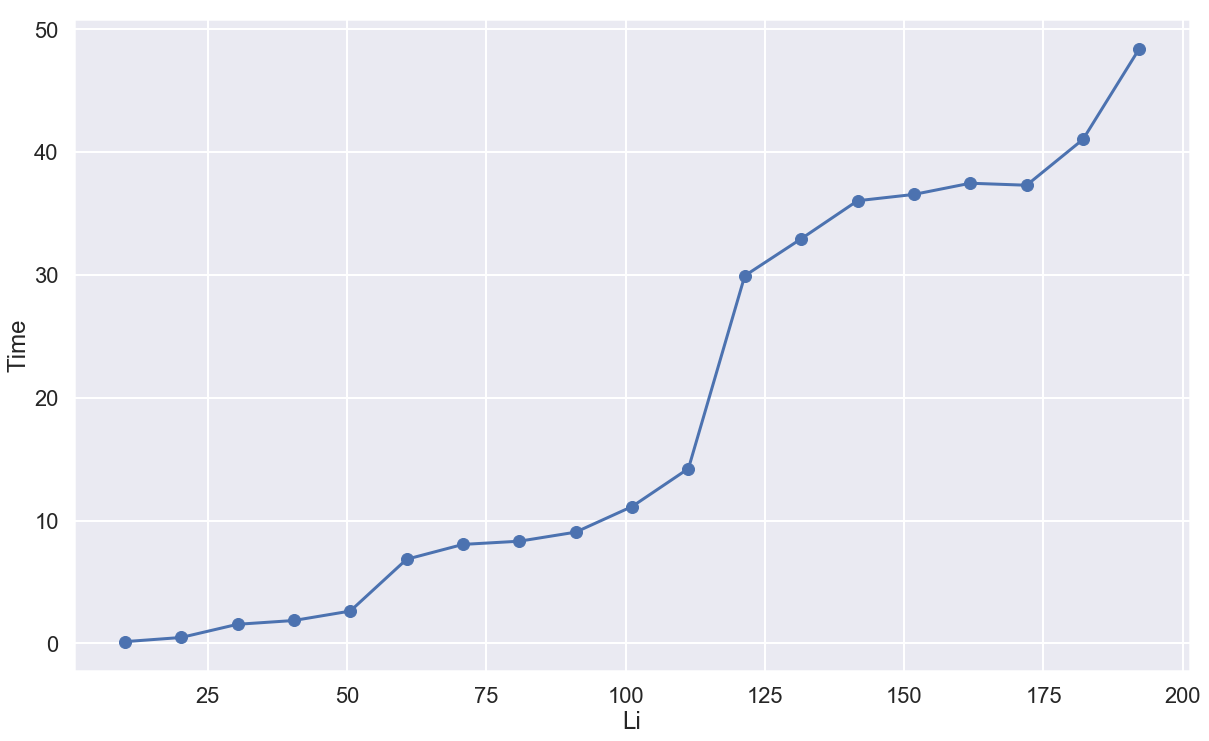

In [26]:
def test_func_broken():
    import time
    f,bounds = (lambda x: np.cos(x)/x/x,[1,12])
    eps=10**-2
    
    m = minimize(f,bounds[0],tol=eps/10)
    x_test,y_test = m.x[0],m.fun
    
    L = -minimize(lambda x: -np.abs(cf(f,x)),bounds[0],tol=10**-5).fun
    
    a = L/100
    b = 100*L
    print('L =',L)
    xi = np.linspace(a,b,20)
    times = []
    Li_plot = []
    for i,Li in enumerate(xi):
        a = time.time()
        x,y,n = broken(f,bounds,L=Li,eps=eps)
        b = time.time()
        if abs(x-x_test) <= eps:
            times.append(b-a)
            Li_plot.append(Li)
            print(i,x,y,n)
        else:
            print('-',i,x,y,n)
    plt.plot(Li_plot,times,'-o')
    plt.xlabel('Li')
    plt.ylabel('Time')
    
    
test_func_broken()
    

In [74]:
f,bounds = (lambda x: np.cos(x)/x/x,[1,12])
eps=10**-2
    
m = minimize(f,bounds[0],tol=10**-3)
m.x[0],m.fun

(2.4579299515810495, -0.1283248759445874)

In [72]:
abs(2.4586760889276476-2.4579299515810495) < 10**-2

True